IMPORTING THE PYTHON  LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error


importing the laptop dataset through pandas

In [4]:
dff=pd.read_csv("c:/Users/Asus/Downloads/laptop_prices_large.csv")
print(dff.head())

   RAM_GB  Storage_GB  Processor_Speed_GHz  Weight_kg  Battery_Hours   Price
0      16        1024                 1.87        2.8              7   65535
1      32         512                 3.14        1.7              6  114478
2       4         512                 2.46        1.8              8   47811
3      16        2048                 2.87        3.3              9   74804
4      16         512                 3.71        2.7              5   79303


some data preprocessing in the laptop dataset

In [5]:
print(dff.shape)
print(dff.describe())
print(dff.info())



(100, 6)
           RAM_GB  Storage_GB  Processor_Speed_GHz   Weight_kg  Battery_Hours  \
count  100.000000   100.00000           100.000000  100.000000     100.000000   
mean    16.320000   967.68000             2.845700    2.534000       6.160000   
std     11.107264   677.39052             0.615368    0.584172       1.973153   
min      4.000000   256.00000             1.810000    1.500000       3.000000   
25%      8.000000   256.00000             2.310000    2.075000       4.000000   
50%     16.000000  1024.00000             2.865000    2.600000       6.000000   
75%     32.000000  1024.00000             3.410000    3.000000       8.000000   
max     32.000000  2048.00000             3.870000    3.500000       9.000000   

               Price  
count     100.000000  
mean    73594.910000  
std     28264.070642  
min     29137.000000  
25%     49308.500000  
50%     64353.500000  
75%    105013.500000  
max    128126.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 

plot the heatmap for the dataset

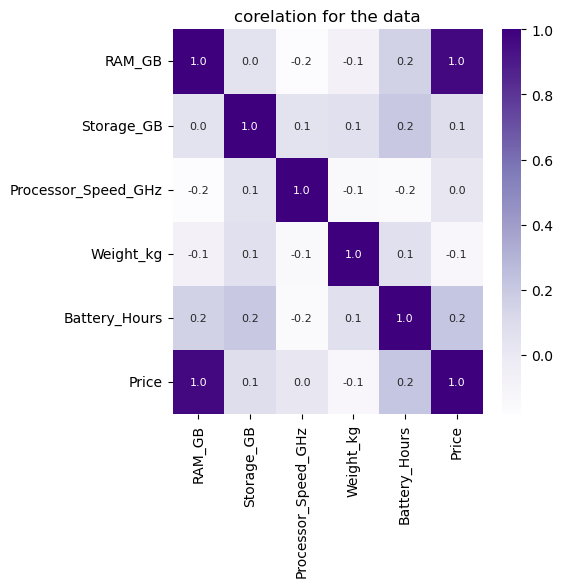

In [19]:
correlation=dff.corr()
plt.figure(figsize=(5,5))
sns.heatmap(correlation,cbar=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Purples')
plt.title("corelation for the data")
plt.show()